In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Load pre-processed data

In [3]:
X_train = pd.read_csv('./readied_data/X_train.csv')
X_test = pd.read_csv('./readied_data/X_test.csv')
y_train = pd.read_csv('./readied_data/y_train.csv', header = None)
y_test = pd.read_csv('./readied_data/y_test.csv', header = None)

In [4]:
X_train.shape

(5359, 729)

In [5]:
y_train.shape

(5359, 2)

In [6]:
X_train.drop(columns = ['Unnamed: 0'], inplace = True)
X_test.drop(columns = ['Unnamed: 0'], inplace = True)


In [7]:
y_train.drop(columns = [y_train.columns.values.tolist()[0]], inplace = True)
y_test.drop(columns = [y_test.columns.values.tolist()[0]], inplace = True)

In [8]:
y_train.columns = ['pay']
y_test.columns = ['pay']

In [9]:
y_train = pd.Series(y_train['pay'])
y_test = pd.Series(y_test['pay'])

### Perform Feature Selection

In [10]:
from cLiML.model_prep import feature_select_logistic_reg

In [11]:
#df_feature = feature_select_logistic_reg(X_train, y_train, cv = 5)

In [12]:
#df_feature.to_csv('df_feature.csv')
#df_feature = pd.read_csv('df_feature.csv')

In [13]:
#df_feature.drop(columns = ['Unnamed: 0'], inplace = True)

In [14]:
#df_feature.head()

In [15]:
#RFE = df_feature[df_feature['ranking'] == 1].variable_RFECV.values.tolist()

In [16]:
#SKB = df_feature[df_feature.score >= 100].variable_skb.values.tolist()

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train);

In [18]:
lr.score(X_train,y_train)

0.9852584437395037

In [19]:
lr.score(X_test, y_test)


0.8925373134328358

In [20]:
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print(cv_scores)
print(cv_scores.mean())

[0.89385475 0.9141791  0.91231343 0.8880597  0.91604478 0.91791045
 0.89552239 0.90485075 0.90841121 0.91028037]
0.9061426934403324


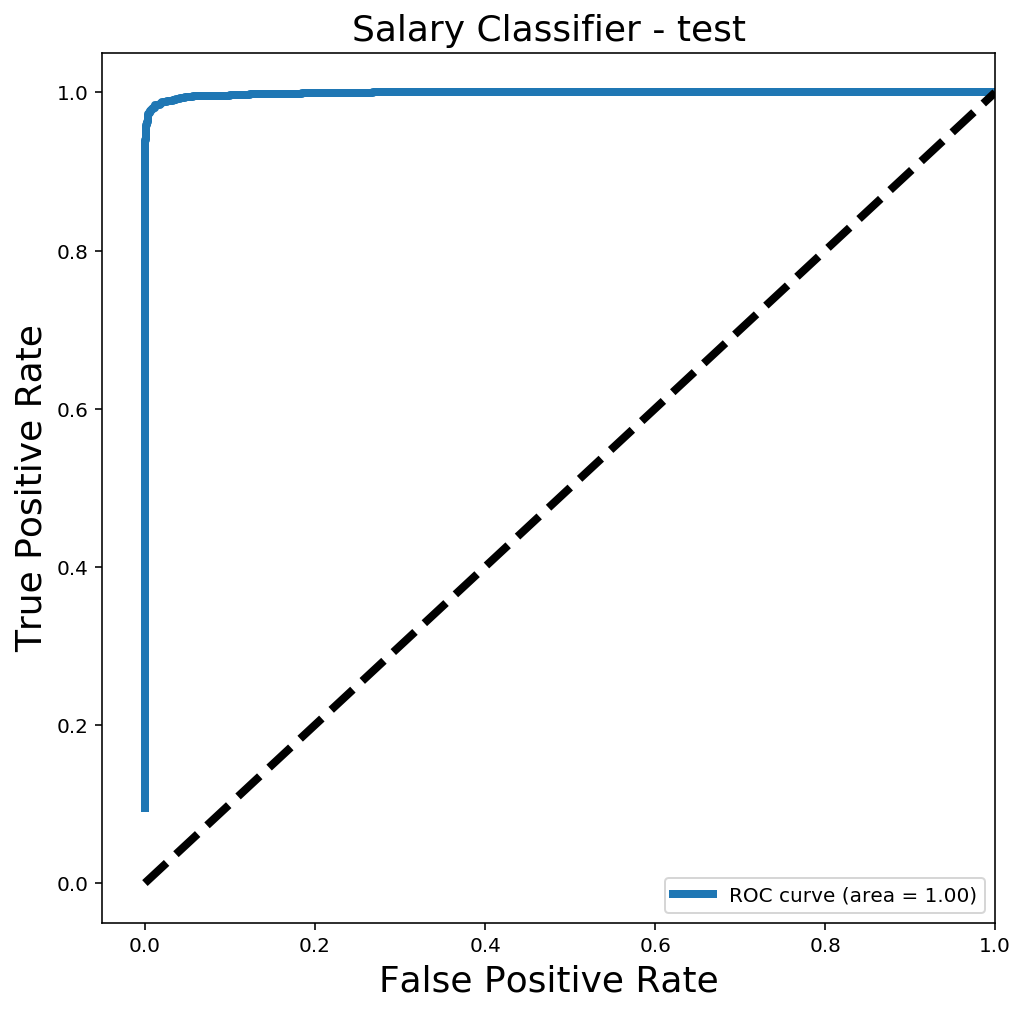

In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Classifier - test', fontsize=18)
plt.legend(loc="lower right")
plt.show()

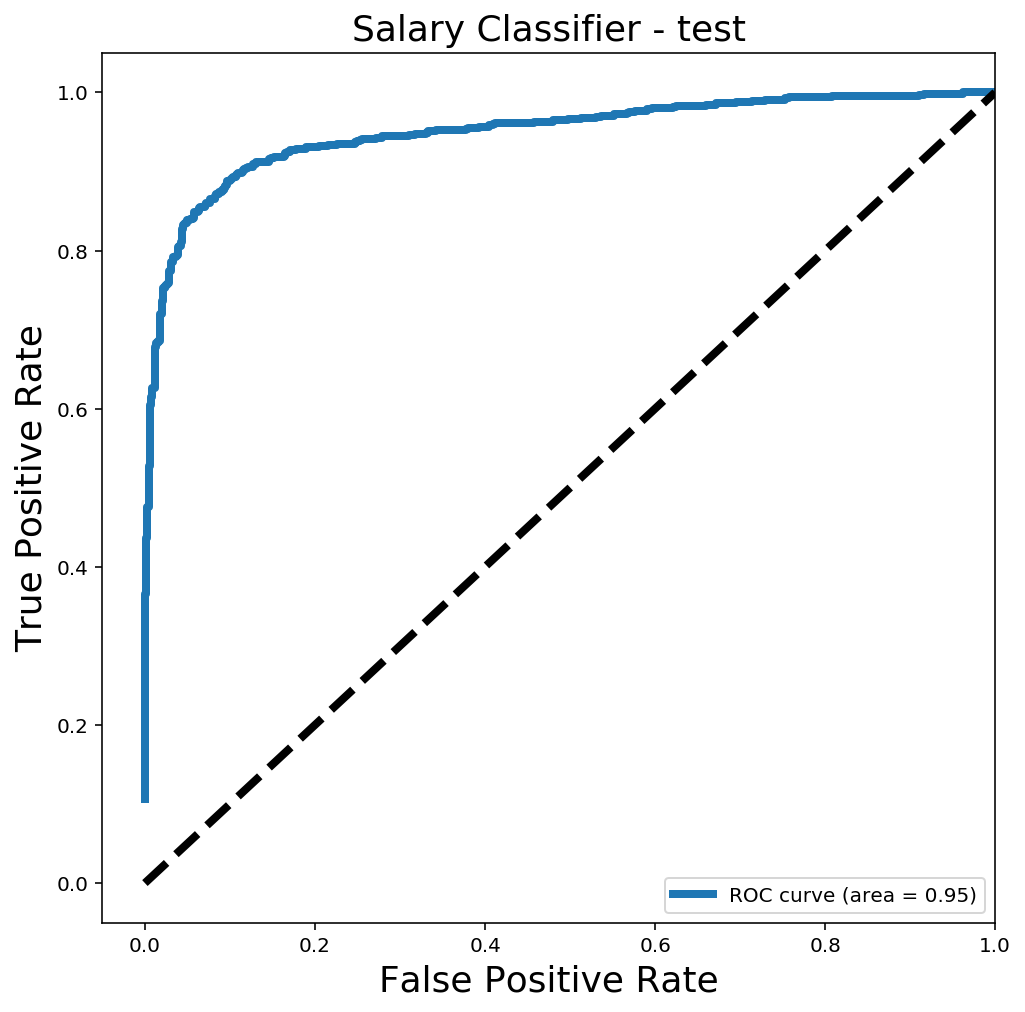

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Classifier - test', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Logistic Regression with tuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
np.logspace(-3, 0, 100)

array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.00811131, 0.00869749, 0.00932603, 0.01      , 0.01072267,
       0.01149757, 0.01232847, 0.01321941, 0.01417474, 0.01519911,
       0.01629751, 0.01747528, 0.01873817, 0.02009233, 0.02154435,
       0.0231013 , 0.02477076, 0.02656088, 0.02848036, 0.03053856,
       0.03274549, 0.03511192, 0.03764936, 0.04037017, 0.04328761,
       0.04641589, 0.04977024, 0.05336699, 0.05722368, 0.06135907,
       0.06579332, 0.07054802, 0.07564633, 0.08111308, 0.0869749 ,
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475

In [25]:
np.arange(150, 200)/10000

array([0.015 , 0.0151, 0.0152, 0.0153, 0.0154, 0.0155, 0.0156, 0.0157,
       0.0158, 0.0159, 0.016 , 0.0161, 0.0162, 0.0163, 0.0164, 0.0165,
       0.0166, 0.0167, 0.0168, 0.0169, 0.017 , 0.0171, 0.0172, 0.0173,
       0.0174, 0.0175, 0.0176, 0.0177, 0.0178, 0.0179, 0.018 , 0.0181,
       0.0182, 0.0183, 0.0184, 0.0185, 0.0186, 0.0187, 0.0188, 0.0189,
       0.019 , 0.0191, 0.0192, 0.0193, 0.0194, 0.0195, 0.0196, 0.0197,
       0.0198, 0.0199])

In [26]:
params = {'penalty': ['l2'],
         'C': np.logspace(-3, 0, 100),
         'solver': ['liblinear']}

lrt = LogisticRegression()
lrt_gs = GridSearchCV(lrt, params, n_jobs = -1, cv = 10)
lrt_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': array([0.001  , 0.00107, ..., 0.9326 , 1.     ]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
lrt_gs.best_score_

0.9281582384773278

In [28]:
lrt_gs.best_params_

{'C': 0.011497569953977356, 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
lrt_gs.score(X_train, y_train)

0.9591341668221683

In [30]:
lrt_gs.score(X_test, y_test)

0.9276119402985075

### Naive Bayes Classification

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
nb.score(X_train, y_train)

0.8891584250793059

In [34]:
nb.score(X_test, y_test)

0.8955223880597015

In [35]:
X_train.shape

(5359, 728)

In [36]:
X_test.shape

(1340, 728)

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc.score(X_train, y_train)

0.9962679604403807

In [40]:
rfc.score(X_test, y_test)

0.9067164179104478

### Random Forest Grid Search

In [41]:
X_train.shape

(5359, 728)

In [42]:
np.arange(250, 950, 100)

array([250, 350, 450, 550, 650, 750, 850])

In [43]:
params = {'max_depth': [15]}

rfct = RandomForestClassifier()
rfct_gs = GridSearchCV(rfct, params, n_jobs = -1, cv = 10)
rfct_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=0)

In [44]:
rfct_gs.best_params_

{'max_depth': 15}

In [45]:
rfct_gs.score(X_train, y_train)

0.977234558686322

In [46]:
rfct_gs.score(X_test, y_test)

0.9014925373134328

### Boosting

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(N_JOBS = -1)
xgb.fit(X_train,y_train)

XGBClassifier(N_JOBS=-1, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [48]:
xgb.score(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9537227094607202

In [49]:
xgb.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9208955223880597

### CATBOOST

In [50]:
from catboost import CatBoostClassifier, Pool, cv

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
catboost = CatBoostClassifier(custom_loss=['Accuracy'], logging_level='Silent')

catboost.fit(X_train, y_train)

In [53]:
catboost.score(X_train, y_train)

0.9777943646202649

In [54]:
catboost.score(X_test, y_test)

0.9291044776119403

### Bagging and Vote Classifier

In [55]:
# vote classify the following 
# Logistic Regression : {'C': 0.01747528400007684, 'penalty': 'l2', 'solver': 'liblinear'}
# Naive Bayes classification
# XGBoost

from sklearn.ensemble import VotingClassifier

# logistic regression
lr = LogisticRegression()
params = {'penalty': ['l2'],
         'C': [0.01747528400007684],
         'solver': ['liblinear']}
lr_gs = GridSearchCV(lr, params, cv = 10)

# Naive Bayes
nb = MultinomialNB()

# XGBoost
xgb = XGBClassifier(N_JOBS = -1)

# catboost
catboost = CatBoostClassifier(custom_loss=['Accuracy'], logging_level='Silent')

# VotingClassifier
vc = VotingClassifier(estimators = [('lr_gs', lr_gs), ('xgb', xgb), ('catboost', catboost)],voting = 'soft', n_jobs = -1)


In [56]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_gs', GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0....True,
       subsample=1)), ('catboost', <catboost.core.CatBoostClassifier object at 0x1a18f9f7f0>)],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [57]:
vc.score(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9697704795670834

In [58]:
vc.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9291044776119403